**Brief Honor Code**. Do the homework on your own. You may discuss ideas with your classmates, but DO NOT copy the solutions from someone else or the Internet. If stuck, discuss with TA.

**1**. (50 points)

Write separate `toolz` pipelines to generate the following variables

- words: a list of all the words in the files `fortune?.txt` in the `data` directory
- reverse_index: a reverse index of words (key=position, value=word)
- index: an index of words (key=word, value=position)
- cat: a list containing the categorical encoding of words

Finally, use `numpy` to convert `cat` into a one-hot matrix with shape (#words, #unique words)

In [1]:
import os
import glob
import string
import re
import imageio
import numpy as np
import matplotlib.pyplot as plt
paths = glob.glob(os.path.join('data', 'fortune*.txt'))

In [2]:
import toolz as tz
import toolz.curried as c
from functools import partial, lru_cache
from functools import reduce

words= tz.pipe(
    sorted(paths),
    c.map(lambda x: open(x,encoding = "utf-8")),
    c.map(lambda x: x.read()),
    c.map(lambda x: x.lower()),
    c.map(lambda x: x.translate(str.maketrans('', '', string.punctuation))),
    c.map(lambda x: x.split()),
    c.reduce(lambda x,y: x+y),
    list
)
words

['the',
 'fortune',
 'you',
 'seek',
 'is',
 'in',
 'another',
 'cookie',
 'a',
 'closed',
 'mouth',
 'gathers',
 'no',
 'feet',
 'a',
 'conclusion',
 'is',
 'simply',
 'the',
 'place',
 'where',
 'you',
 'got',
 'tired',
 'of',
 'thinking',
 'a',
 'cynic',
 'is',
 'only',
 'a',
 'frustrated',
 'optimist',
 'a',
 'foolish',
 'man',
 'listens',
 'to',
 'his',
 'heart',
 'a',
 'wise',
 'man',
 'listens',
 'to',
 'cookies',
 'you',
 'will',
 'die',
 'alone',
 'and',
 'poorly',
 'dressed',
 'a',
 'fanatic',
 'is',
 'one',
 'who',
 'cant',
 'change',
 'his',
 'mind',
 'and',
 'wont',
 'change',
 'the',
 'subject',
 'if',
 'you',
 'look',
 'back',
 'you’ll',
 'soon',
 'be',
 'going',
 'that',
 'way',
 'you',
 'will',
 'live',
 'long',
 'enough',
 'to',
 'open',
 'many',
 'fortune',
 'cookies',
 'an',
 'alien',
 'of',
 'some',
 'sort',
 'will',
 'be',
 'appearing',
 'to',
 'you',
 'shortly',
 'do',
 'not',
 'mistake',
 'temptation',
 'for',
 'opportunity',
 'flattery',
 'will',
 'go',
 'far',

In [3]:
reverse_index=  tz.pipe(
                        words,
                        tz.unique,
                        enumerate,
                        dict)

In [4]:
print(reverse_index)

{0: 'the', 1: 'fortune', 2: 'you', 3: 'seek', 4: 'is', 5: 'in', 6: 'another', 7: 'cookie', 8: 'a', 9: 'closed', 10: 'mouth', 11: 'gathers', 12: 'no', 13: 'feet', 14: 'conclusion', 15: 'simply', 16: 'place', 17: 'where', 18: 'got', 19: 'tired', 20: 'of', 21: 'thinking', 22: 'cynic', 23: 'only', 24: 'frustrated', 25: 'optimist', 26: 'foolish', 27: 'man', 28: 'listens', 29: 'to', 30: 'his', 31: 'heart', 32: 'wise', 33: 'cookies', 34: 'will', 35: 'die', 36: 'alone', 37: 'and', 38: 'poorly', 39: 'dressed', 40: 'fanatic', 41: 'one', 42: 'who', 43: 'cant', 44: 'change', 45: 'mind', 46: 'wont', 47: 'subject', 48: 'if', 49: 'look', 50: 'back', 51: 'you’ll', 52: 'soon', 53: 'be', 54: 'going', 55: 'that', 56: 'way', 57: 'live', 58: 'long', 59: 'enough', 60: 'open', 61: 'many', 62: 'an', 63: 'alien', 64: 'some', 65: 'sort', 66: 'appearing', 67: 'shortly', 68: 'do', 69: 'not', 70: 'mistake', 71: 'temptation', 72: 'for', 73: 'opportunity', 74: 'flattery', 75: 'go', 76: 'far', 77: 'tonight', 78: 'he'

In [5]:
index = tz.pipe(
                 words,
                 tz.unique,
                 enumerate,
                 dict,
                 lambda x: {value:key for key, value in x.items()}
                 )

In [6]:
print(index)

{'the': 0, 'fortune': 1, 'you': 2, 'seek': 3, 'is': 4, 'in': 5, 'another': 6, 'cookie': 7, 'a': 8, 'closed': 9, 'mouth': 10, 'gathers': 11, 'no': 12, 'feet': 13, 'conclusion': 14, 'simply': 15, 'place': 16, 'where': 17, 'got': 18, 'tired': 19, 'of': 20, 'thinking': 21, 'cynic': 22, 'only': 23, 'frustrated': 24, 'optimist': 25, 'foolish': 26, 'man': 27, 'listens': 28, 'to': 29, 'his': 30, 'heart': 31, 'wise': 32, 'cookies': 33, 'will': 34, 'die': 35, 'alone': 36, 'and': 37, 'poorly': 38, 'dressed': 39, 'fanatic': 40, 'one': 41, 'who': 42, 'cant': 43, 'change': 44, 'mind': 45, 'wont': 46, 'subject': 47, 'if': 48, 'look': 49, 'back': 50, 'you’ll': 51, 'soon': 52, 'be': 53, 'going': 54, 'that': 55, 'way': 56, 'live': 57, 'long': 58, 'enough': 59, 'open': 60, 'many': 61, 'an': 62, 'alien': 63, 'some': 64, 'sort': 65, 'appearing': 66, 'shortly': 67, 'do': 68, 'not': 69, 'mistake': 70, 'temptation': 71, 'for': 72, 'opportunity': 73, 'flattery': 74, 'go': 75, 'far': 76, 'tonight': 77, 'he': 78

In [7]:
cat = tz.pipe(
           words,
           c.map(lambda x : index[x]),
           list
             )

In [8]:
print(cat)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 8, 14, 4, 15, 0, 16, 17, 2, 18, 19, 20, 21, 8, 22, 4, 23, 8, 24, 25, 8, 26, 27, 28, 29, 30, 31, 8, 32, 27, 28, 29, 33, 2, 34, 35, 36, 37, 38, 39, 8, 40, 4, 41, 42, 43, 44, 30, 45, 37, 46, 44, 0, 47, 48, 2, 49, 50, 51, 52, 53, 54, 55, 56, 2, 34, 57, 58, 59, 29, 60, 61, 1, 33, 62, 63, 20, 64, 65, 34, 53, 66, 29, 2, 67, 68, 69, 70, 71, 72, 73, 74, 34, 75, 76, 77, 78, 42, 79, 80, 81, 82, 83, 84, 20, 85, 29, 86, 80, 78, 42, 79, 87, 4, 88, 80, 2, 78, 42, 89, 90, 4, 91, 92, 64, 93, 94, 20, 95, 96, 94, 20, 33, 0, 97, 98, 99, 53, 100, 101, 102, 103, 104, 0, 105, 106, 107, 8, 7, 0, 108, 109, 53, 100, 110, 106, 111, 112, 113, 114, 115, 116, 117, 2, 34, 53, 118, 119, 5, 41, 120, 0, 121, 29, 122, 4, 123, 124, 125, 2, 126, 127, 128, 129, 80, 130, 131, 132, 133, 134, 135, 136, 1, 33, 137, 20, 100, 138, 139, 0, 140, 82, 141, 62, 142, 103, 143, 124, 144, 145, 103, 146, 2, 147, 127, 131, 148, 149, 1, 69, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 5, 

In [9]:
n = len(cat)
p = len(index)
m = np.zeros((n,p), dtype='int')
i = np.arange(len(cat))
m[i, cat] = 1
m

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

**2**. (50 points)

Write a simulation of diffusion-limited aggregation. In this simulation, we have $n$ random walkers. Each walker starts from row 0 and a random column number, and in each step, the walker increases the row number by 1 and randomly increments or decrements its column number by 1. If the column number of the walker exceeds the maximum or becomes negative, the walker emerges on the other side (toroidal boundary conditions). At any time, if any of the walkers 8 neighbors is non-zero, the walker stops in that position, and the number of steps taken is recorded in that (row, column).

Write a function `dla(nwalkers, width, height, seed)` that returns a matrix with shape (width, height) after running `nwalkers` random walks as described above. The argument `ssed` is used to initialize a random number seed. Internally, the function should create a (width, height+1) matrix, and initialize the last row to have 1 with all other entries 0.

Feel free to use loops. This function is not easily vectorized.

Plot the returned matrix for the arguments `nwalkers=10000, width=300, height=150, seed=123`. It should look like this:

![dla](figs/dla.png)

In [10]:
def dla(nwalkers, width, height, seed) :
    """
    This function will show the plot for random walkers
    nwalkers is the number of walkers needed
    width of the plot
    height of plot
    the seed set so that it's psudo random
    """
    np.random.seed(seed=seed)
    height = height
    width = width
    x0 = np.zeros((height, width))
    x1 = np.vstack((x0,np.ones(width).reshape(1,-1)))
    #create position matrix
    x2 = np.hstack([np.zeros(height+1).reshape(-1,1),x1,np.zeros(height+1).reshape(-1,1)])
    for i in range(nwalkers): 
        col = np.random.choice(range(1,width + 1))
        start = np.array([0, col])
        sumtotal = 0
        stepcount = 0
        while sumtotal == 0: 
            lw = np.random.choice([-1,1])
            step = np.array([1,lw])
            x = start + step
            if(x[1] == width + 1):
                x[1] = 1
            
            elif(x[1] == 0): 
                x[1] = width
            
            check = [(x[0]+k, x[1]+j) for k in range(-1,2) for j in range(-1,2)]
            sumtotal = np.sum([x2[check[t][0], check[t][1]] for t in range(len(check))])
            start = x
        x2[start[0], start[1]] = start[0]
        x2[:, -1]= x2[:, 1] = x1[:,0]
        x2[:, 0] = x2[:,-2]= x1[:,-1]
    #deseclt the columns and rows create for operation
    x3 = x2[:-1, 1: width]
    plt.imshow(x3)
    plt.tick_params(
    axis='both', which='both', bottom='off', 
    top='off', labelbottom='off', right='off', 
    left='off', labelleft='off') 
    plt.show()

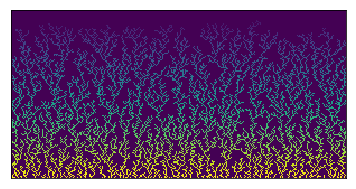

In [11]:
dla(10000, 300, 150, 123)